## 9.1 가장 흔한 방식, 일반 CSS
- 처음 생성한 프로젝트는 일반 CSS 방식으로 만들어져있다.
- CSS를 작성할 때 가장 중요한 점은 CSS 클래스를 중복되지 않게 만드는 것
    - 이름을 지을 때 특별한 규칙을 사용하여 짓는 것
    - CSS Selector를 활용
        - .App 안에 있는 .logo에 스타일 적용 > .App .logo{...}
    - 컴포넌트 이름 - 클래스 형태
    - BEM 네이밍 : 해당 클래스가 어디에서 어떤 용도로 사용되는지 명확하게 작성

## 9.2 Sass 사용하기
- Sass(Syntactically Awesome Style Sheets)는 CSS 전처리기로 복잡한 작업을 쉽게 할 수 있도록 해주고, 재활용성을 높이고, 가독성을 높여 유지 보수를 쉽게 해준다.
- .scss와 .sass 확장자를 지원
- sass 라이브러리 설치 yarn add sass
- SassComponent.scss
    ```scss
    // 변수 사용하기
    $red: #fa5252;
    $orange: #fd7e14;
    $yellow: #fcc419 ;
    $green: #40c057 ;
    $blue: #339af0 ;
    $indigo: #5c7cfa ;
    $violet: #7950f2 ;

    // 믹스인 만들기
    @mixin square($size){
        $calculated: 32px*$size;
        width:$calculated;
        height: $calculated;
    }

    .SassComponent {
        display: flex;
        .box {
        background: red; // 일반 CSS 에선 .SassComponent .box 와 마찬가지
        cursor: pointer;
        transition: all 0.3s ease-in;
        &.red {
            // .red 클래스가 .box 와 함께 사용 됐을 때
            background: $red;
            @include square(1);
        }
        &.orange {
            background: $orange;
            @include square(2);
        }
        &.yellow {
            background: $yellow;
            @include square(3);
        }
        &.green {
            background: $green;
            @include square(4);
        }
        &.blue {
            background: $blue;
            @include square(5);
        }
        &.indigo {
            background: $indigo;
            @include square(6);
        }
        &.violet {
            background: $violet;
            @include square(7);
        }
        &:hover {
            // .box 에 마우스 올렸을 때
            background: black;
        }
        }
    }
    ```
- SassComponent.js 작성
```js
import './SassComponent.scss';

const SassComponent = () => {
  return (
    <div className="SassComponent">
      <div className="box red" />
      <div className="box orange" />
      <div className="box yellow" />
      <div className="box green" />
      <div className="box blue" />
      <div className="box indigo" />
      <div className="box violet" />
    </div>
  );
};

export default SassComponent;
```
- 결과
    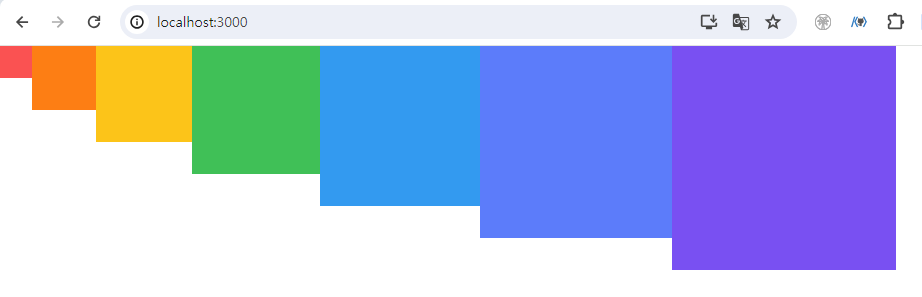

- utils 함수 분리
    - 여러 파일에서 사용 될 수 있는 Sass 변수 및 믹스인은 다른 파일로 분리하여 작성
    - src/styles/utils.scss 참고
    - @import './styles/utils';로 불러와 사용

### sass-loader 설정 커스터마이징
- 필수는 아니지만 해 두면 유용


## 9.3 CSS Module


## 9.4 styled-components


## 9.5 정리